In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df_train = pd.read_feather('./train_removed_corr.feather')
df_val = pd.read_feather('./val_removed_corr.feather') 

df_X_train = df_train.drop(columns = ['playMin_diff'])
y_train = df_train.playMin_diff

df_X_val = df_val.drop(columns = ['playMin_diff'])
y_val = df_val.playMin_diff

rfr = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr.fit(df_X_train, y_train)
rfr.score(df_X_val, y_val)

0.7364355801587418

In [3]:
import eli5
from eli5.sklearn import PermutationImportance
pmi_limited = PermutationImportance(rfr).fit(df_X_val, y_val)

In [4]:
eli5.explain_weights_df(pmi_limited, feature_names = df_X_val.columns.to_list())

,feature,weight,std
0,playFGA_diff,0.519041,0.004429
1,playDRB_diff,0.293835,0.003217
2,playAST_diff,0.216807,0.002012
3,playPTS_diff,0.186844,0.001228
4,playPF_diff,0.140852,0.003091
5,playTO_diff,0.104733,0.001696
6,playFT%_diff,0.091933,0.001460
7,gmDayofyear,0.089875,0.002336
8,playSTL_diff,0.072400,0.001314
9,play3PA_diff,0.067238,0.001092


In [5]:
from plotnine import *
sampled_train = df_train.sample(n=3000, random_state=1)

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is

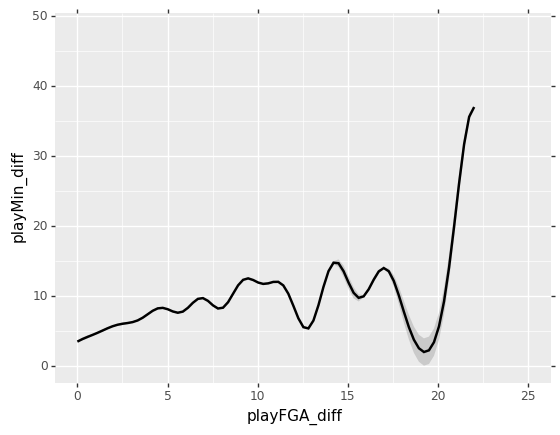

<ggplot: (7581273734)>

In [6]:
(ggplot(sampled_train, aes('playFGA_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 25) + ylim(0, 48))

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is

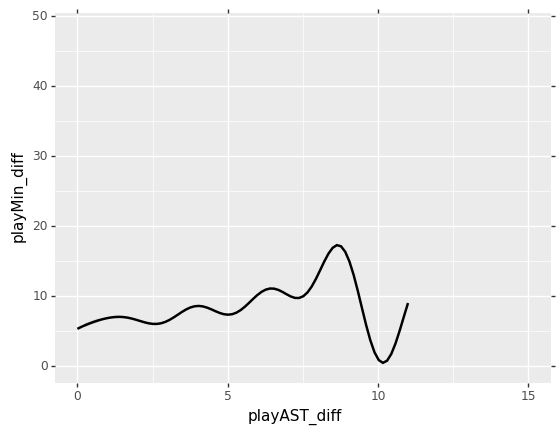

<ggplot: (-9223372029273491347)>

In [7]:
(ggplot(sampled_train, aes('playAST_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 15) + ylim(0, 48))

/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:238: UserWarning: See sklearn.gaussian_process.GaussianProcessRegressor for parameters to pass in as 'method_args'
  "See sklearn.gaussian_process.GaussianProcessRegressor "
/Users/jz/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/jz/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


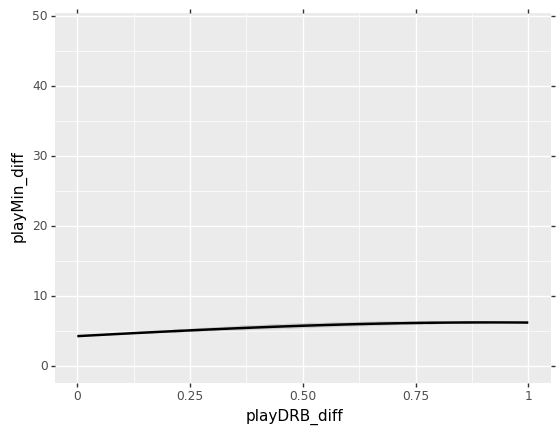

<ggplot: (7019473686)>

In [9]:
(ggplot(sampled_train, aes('playDRB_diff', 'playMin_diff'))
 + stat_smooth(se=True, method='gpr') + xlim(0, 1) + ylim(0, 48))

In [10]:
df_X_val.head()

,gmDayofyear,playPTS_diff,playAST_diff,playTO_diff,playSTL_diff,playBLK_diff,playPF_diff,playFGA_diff,play3PA_diff,playDRB_diff,playFT%_diff,IsStarter_diff
0,352.0,14.0,2.0,0.0,-1.0,1.0,0.0,6.0,0.0,-5.0,-0.3333,0.0
1,18.0,8.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,0.0,0.0000,0.0
2,81.0,3.0,0.0,-1.0,0.0,1.0,0.0,1.0,1.0,-1.0,0.0000,0.0
3,56.0,-3.0,0.0,2.0,0.0,-1.0,1.0,-3.0,0.0,-3.0,0.5000,0.0
4,36.0,3.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,3.0,0.5000,0.0


In [12]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr.fit(df_X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [13]:
from pdpbox.pdp import pdp_plot, pdp_isolate
import pdpbox
def plot_pdp(model, X, feature_names, feature, clusters = None):
    iso = pdp_isolate(rfr, df_X_train, df_X_train.columns, feature)
    return pdp_plot(iso, feature, plot_lines = True, cluster=clusters, n_cluster_centers=clusters)

In [ ]:
%%time
plot_pdp(rfr, df_X_train.sample(2000), df_X_train.columns, 'playFGA_diff', None)

CPU times: user 29.4 s, sys: 2.99 s, total: 32.4 s
Wall time: 27.4 s


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a39148b70>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c67165470>})

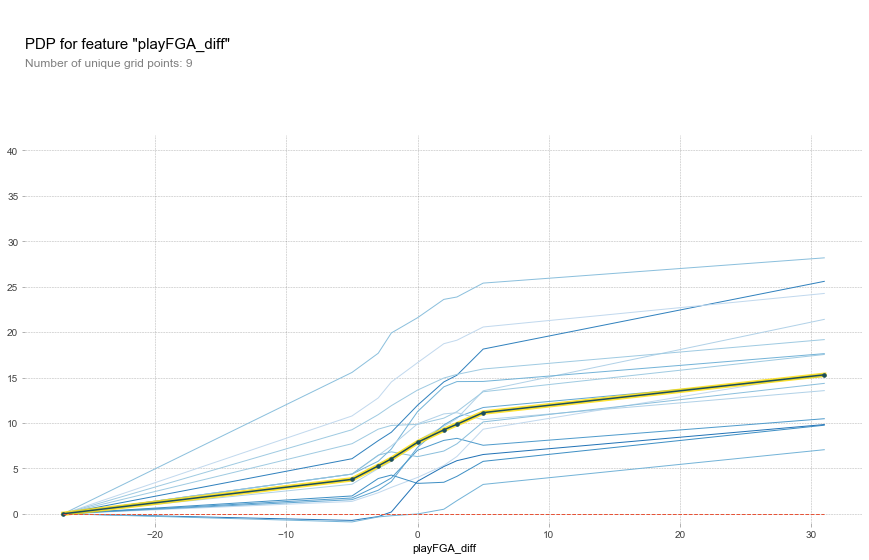

In [14]:
%%time
plot_pdp(rfr, df_X_train.sample(2000), df_X_train.columns, 'playFGA_diff', 15)

In [15]:
first_tree = rfr.estimators_[0]

In [16]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


def plot_tree(dt, feature_names, max_depth):
    return Source(tree.export_graphviz(dt, out_file=None,
                                feature_names=feature_names, max_depth=max_depth))

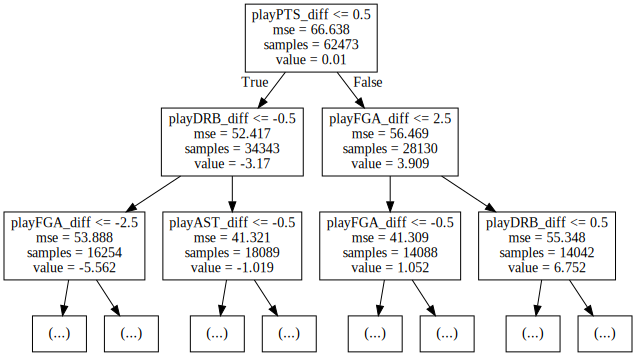

In [17]:
plot_tree(first_tree, df_X_train.columns, 2)

In [18]:
y_train.mean()

0.0038247707166626085

In [19]:
first_obs = df_X_train.loc[0]

In [20]:
import eli5
explained_df_first_obs = eli5.explain_prediction_df(first_tree, first_obs)

selected = explained_df_first_obs.feature.isin(['playPTS_diff', '<BIAS>', 'playDRB_diff'])
explained_df_first_obs[selected]

,target,feature,weight,value
5,y,<BIAS>,0.010074,1.0
10,y,playPTS_diff,-3.180253,-8.0
11,y,playDRB_diff,-3.678083,-1.0


In [21]:
explained_df_first_obs_rfr = eli5.explain_prediction_df(rfr, first_obs)
explained_df_first_obs_rfr

,target,feature,weight,value
0,y,playSTL_diff,2.214034,2.0
1,y,playTO_diff,0.311523,1.0
2,y,IsStarter_diff,0.218023,0.0
3,y,<BIAS>,0.018911,1.0
4,y,playFGA_diff,-0.004386,-1.0
5,y,playFT%_diff,-0.032260,0.0
6,y,play3PA_diff,-0.141179,0.0
7,y,playAST_diff,-0.166910,0.0
8,y,gmDayofyear,-0.232453,305.0
9,y,playBLK_diff,-0.342502,-1.0


In [22]:
%%time
prediction_expls = []
for idx, row in df_X_val.iterrows():
    prediction_expls.append(eli5.explain_prediction_df(rfr, row))

CPU times: user 7min 59s, sys: 859 ms, total: 8min
Wall time: 8min


In [23]:
train_expl_df = pd.concat(prediction_expls, keys=df_X_train.index, 
                         names=['observation'])

In [24]:
train_expl_df.value = train_expl_df.value.astype('float64')

In [25]:
train_expl_df.iloc[:5]

target       feature    weight  value
observation                                        
0           0      y  playFGA_diff  4.119044    6.0
            1      y  playPTS_diff  3.106744   14.0
            2      y   gmDayofyear  1.347182  352.0
            3      y  playAST_diff  0.762328    2.0
            4      y   playTO_diff  0.110137    0.0

In [26]:
train_unstacked_df = (train_expl_df.groupby(['observation','feature'])
                               .weight
                               .aggregate('first')
                               .unstack())
train_unstacked_df.head()

feature,<BIAS>,IsStarter_diff,gmDayofyear,play3PA_diff,playAST_diff,playBLK_diff,playDRB_diff,playFGA_diff,playFT%_diff,playPF_diff,playPTS_diff,playSTL_diff,playTO_diff
observation,,,,,,,,,,,,,
0,0.018911,-0.324989,1.347182,-0.925141,0.762328,-1.071470,-5.994703,4.119044,0.050969,-0.292327,3.106744,0.093316,0.110137
1,0.018911,-0.075485,1.805489,0.115122,-0.136673,-0.012389,-0.631269,0.664024,-0.063952,2.586549,2.319560,0.455475,0.287970
2,0.018911,0.078070,-0.807697,0.424230,-0.248616,0.012198,-1.371013,-0.045671,-0.466553,-0.246811,2.306558,-0.363931,-1.623009
3,0.018911,0.424660,0.498719,-0.584954,-0.072693,0.351520,-2.201696,-3.017257,0.255027,0.829738,-0.887202,0.074911,2.643649
4,0.018911,-0.279622,-0.531326,-0.405574,0.306530,-0.072898,2.934207,2.867587,0.667135,0.879257,2.124756,0.455331,0.369040


In [27]:
train_unstacked_df.describe()[train_unstacked_df.describe().index.isin(['mean', 'std'])]

feature,<BIAS>,IsStarter_diff,gmDayofyear,play3PA_diff,playAST_diff,playBLK_diff,playDRB_diff,playFGA_diff,playFT%_diff,playPF_diff,playPTS_diff,playSTL_diff,playTO_diff
mean,1.891080e-02,0.004489,0.014570,0.002957,-0.004955,-0.005280,0.005484,-0.029467,0.017599,0.001248,-0.015782,-0.006487,0.001887
std,8.410110e-15,1.535797,1.210512,0.910490,1.709676,0.898226,2.254338,3.830484,1.046286,1.240436,2.314316,0.921633,1.079658


In general, the standard deviation is much larger than the mean which means it does not matter for some observations.

### Back to Plotting

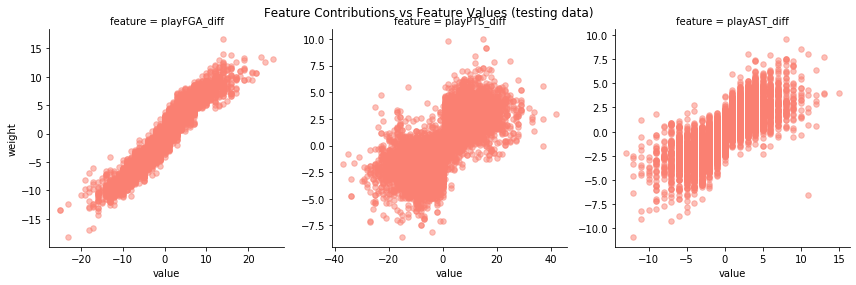

In [29]:
import seaborn as sns
fg = sns.lmplot(x='value', y='weight', col='feature',
                data=train_expl_df.loc[train_expl_df.feature.isin(['playFGA_diff', 'playPTS_diff', 'playAST_diff'])], 
                col_order=['playFGA_diff', 'playPTS_diff', 'playAST_diff'], sharex=False, sharey=False, col_wrap=3, fit_reg=False, 
                height=4, scatter_kws={'color':'salmon', 'alpha': 0.5, 's':30})


fg.fig.suptitle('Feature Contributions vs Feature Values (testing data)')
fg.fig.subplots_adjust(top=0.90);

We could find that if a player could have greater difference playFGA(Field goal attempts made by player), playPTS(Points scored by player) and playAST(Assists made by player), they would be more likely to change their play minute in next game